In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression  as lp
from sklearn.metrics import mean_squared_error as ms,  r2_score
##Upload the data
df = pd.read_excel("860_A1_Q4_Upload.xlsx")

In [3]:
df.head(2)

Obs    Y  Experience  Height  Weight
0    1  450           3      52      58
1    2  330           3      33      36

a) i.	Run a linear regression to explain y in terms of experience and height.  Does height appear to explain y? 

In [4]:
## Collinearty between Height and Experince ## R 
print(f"Collinearity of height and experience is {df['Experience'].corr(df['Height']):.2f}")

Collinearity of height and experience is -0.09


[Paul: not really sure why the above correlation is calculated.]

In [6]:
print(f"Collinearity of height and weight is {df['Weight'].corr(df['Height']):.2f}")

Collinearity of height and weight is 0.85


In [15]:
## Train the regression model with 25 examples and predict the data . features - Height and Experience
X = df.loc[:, ['Height','Experience']].values
Y = df.loc[:, ['Y']].values
## create object of Linearregression class
reg = lp()
## Fit the linear rgerssion
X_train = X[:26, :]
Y_train = Y[:26]

reg = reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [11]:
Y_train.size # note Python start indexing with 0 instead of 1, could use X[:25,:] and Y[:25] instead

26

In [17]:
X_train = X[:25, :]
Y_train = Y[:25]

reg = reg.fit(X_train,Y_train)
# Y_pred = reg.predict(X).astype('int64') # [Paul: not sure why you would put all Y_pred into integers]
## Model Evaluation 
Intercepts = reg.intercept_
Coef = reg.coef_
print(f"Model Function ->> Y_Prediction = {Intercepts[0]:.4f} + {Coef[0,0]:.4f}*Height + {Coef[0,1]:.4f}*Experience")
print(f"The mean sqaured error with hieght and experince as our model feature is : {ms(Y, Y_pred):.3f}")
print(f"The R-Squared value is: {r2_score(Y,Y_pred):.2f}")

Model Function ->> Y_Prediction = -39.5389 + 1.6693*Height + 101.7732*Experience
The mean sqaured error with hieght and experince as our model feature is : 3092.910
The R-Squared value is: 0.83


- As per the above result, The model is powerful and explains 83% of the variability in the Y value. Given that model has both Height and Experience as variable
- Height poorly explains Y. (We can infer this from the fact that the coefficient value of Hieght is very low compared to Experince)
[Paul] low coef value doesn't mean explanatory power is low. Results of F and t tests matters more.


       
-------------------------------------------------------------------------------------------------------------------


a) ii.	Run a linear regression to explain y in terms of experience and weight.  Does weight appear to explain y? 

In [110]:
## Collinearty between Height and Experince
print(f"Collinearity of height and experience is {df['Experience'].corr(df['Weight']):.2f}")

Collinearity of height and experience is -0.09


In [36]:
## Train the regression model with 25 examples and predict the data . features - Weight and Experience
X = df.loc[:, ['Weight','Experience']].values
Y = df.loc[:, ['Y']].values
## create object of Linearregression class
reg = lp()
## Fit the linear rgerssion
reg = reg.fit(X_train,Y_train) # [Paul: I think X_train has not been updated, could create subtle bug here]
X_train = X[:26, :]
Y_train = Y[:26]
reg = reg.fit(X_train,Y_train)
Y_pred = reg.predict(X).astype('int64')
## Model Evaluation 
Intercepts = reg.intercept_
Coef = reg.coef_
print(f"Model Function ->> Y_Prediction =  {Intercepts[0]:.4f} + {Coef[0,0]:.4f}*Weight + {Coef[0,1]:.4f}*Experience")
print(f"The mean sqaured error with Weight and experince as our model feature is : {ms(Y, Y_pred):.3f}")
print(f"The R-Squared value is: {r2_score(Y,Y_pred):.2f}")

Model Function ->> -67.9285 + 1.6564*Weight + 108.2833*Experience
The mean sqaured error with Weight and experince as our model feature is : 3788.870
The R-Squared value is: 0.79


- As per the above result, The model is powerful and explains 79% of the variability in the Y value. Given that model has both Height and Experience as variable
- Weight poorly explains Y. (We can infer this from the fact that the coefficient value of Wieght is very low compared to Experince)

-----------------------------------------------------------------------------------------------------------------------

a) iii.	Run a linear regression to explain y in terms of experience and height and weight. Do height and weight appear to explain y? 

In [113]:
## Collinearty between Height and Experince
print(f"Collinearity of height and experience is {df['Height'].corr(df['Weight']):.2f}")

Collinearity of height and experience is 0.85


In [46]:
## Train the regression model with 25 examples and predict the data . features - Height and Weight and Experience
X = df.loc[:, ['Weight','Height','Experience']].values
Y = df.loc[:, ['Y']].values
X_train = X[:26, :]
Y_train = Y[:26]
## create object of Linearregression class
reg = lp()
## Fit the linear rgerssion
reg = reg.fit(X_train,Y_train)
Y_pred = reg.predict(X).astype('int64')
## Model Evaluation
Intercepts = reg.intercept_
Coef = reg.coef_
print(f"Model Function->> Y_Prediction =  {Intercepts[0]:.4f} + {Coef[0,0]:.4f}*Weight + {Coef[0,1]:.4f}*Height + {Coef[0,2]:.4f}*Experience")
print(f"Model Function ->> {Intercepts[0]} + {Coef[0,0]}*Height + {Coef[0,1]}*Experience")
print(f"The mean sqaured error with hieght and experince as our model feature is : {ms(Y, Y_pred):.3f}")
r2 = r2_score(Y,Y_pred)
print(f"The R-Squared value is: {r2:.2f}")
adj_r2 = (1 - (1 - r2) * ((len(Y) - 1) / (len(Y) - np.size(X,1) - 1)))
print(f"The Adjusted R-Squared value is: {adj_r2:.2f}")

Model Function->> Y_Prediction =  -24.5216 + -0.5246*Weight + 2.0568*Height + 99.0284*Experience
Model Function ->> -24.521624057263296 + -0.5245669073453458*Height + 2.0567699328107096*Experience
The mean sqaured error with hieght and experince as our model feature is : 3145.640
The R-Squared value is: 0.83
The Adjusted R-Squared value is: 0.82


- As per the above result, The model is powerful and explains 83% of the variability in the Y value. Given that model has both Height, Weight and Experience as variable
- Height  and Weight poorly explains Y. (We can infer this from the fact that the coefficient value of Hieght and Weight is very low compared to Experince)




----------------------------------------------------------------------------------------------------------------------

b.	Do these variables appear to be significant when considered individually? 

Model Function ->> Y_Prediction =  166.4902 + 4.1503*Height
The mean sqaured error with Height as our model feature is : 26706.570
The R-Squared value is: -0.48

Model Function ->> Y_Prediction =   140.7998 + 4.3065*Weight
The mean sqaured error with Weight  as our model feature is : 22173.230
The R-Squared value is: -0.23

Model Function ->> Y_Prediction =  -19.3360 + 117.7717*Experience
The mean sqaured error with Experience as our model feature is : 5414.290
The R-Squared value is: 0.70


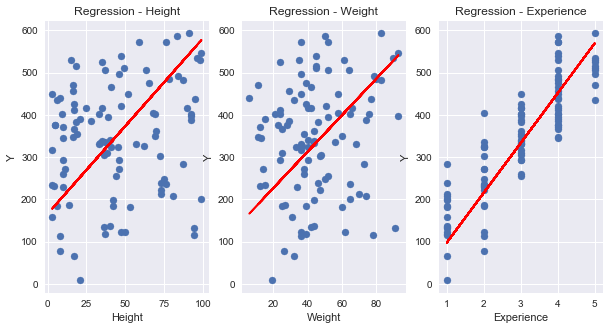

In [47]:
Y = df.loc[:, ['Y']].values
Y_train = Y[:26]
################################ Model using the variables individually ##########################################

## Using only Height Variable
X1 = df.loc[:, ['Height']].values
X1_train = X1[:26, :]
reg = lp()
reg = reg.fit(X1_train,Y_train)
Y_pred1 = reg.predict(X1).astype('int64')
# Model Evaluation 
Intercepts = reg.intercept_
Coef = reg.coef_
print(f"Model Function ->> Y_Prediction =  {Intercepts[0]:.4f} + {Coef[0,0]:.4f}*Height")
print(f"The mean sqaured error with Height as our model feature is : {ms(Y, Y_pred1):.3f}")
print(f"The R-Squared value is: {r2_score(Y,Y_pred1):.2f}")

## Using only Weight Variable
X2 = df.loc[:, ['Weight']].values
X2_train = X2[:26, :]
reg = lp()
reg = reg.fit(X2_train,Y_train)
Y_pred2 = reg.predict(X2).astype('int64')
# Model Evaluation 
Intercepts = reg.intercept_
Coef = reg.coef_
print(f"\nModel Function ->> Y_Prediction =   {Intercepts[0]:.4f} + {Coef[0,0]:.4f}*Weight")
print(f"The mean sqaured error with Weight  as our model feature is : {ms(Y, Y_pred2):.3f}")
print(f"The R-Squared value is: {r2_score(Y,Y_pred2):.2f}")

## Using only Experince Variable
X3 = df.loc[:, ['Experience']].values
X3_train = X3[:26, :]
reg = lp()
reg = reg.fit(X3_train,Y_train)
Y_pred3 = reg.predict(X3).astype('int64')
# Model Evaluation 
Intercepts = reg.intercept_
Coef = reg.coef_
print(f"\nModel Function ->> Y_Prediction =  {Intercepts[0]:.4f} + {Coef[0,0]:.4f}*Experience")
print(f"The mean sqaured error with Experience as our model feature is : {ms(Y, Y_pred3):.3f}")
print(f"The R-Squared value is: {r2_score(Y,Y_pred3):.2f}")




### Regression model plot for all three models
plt.style.use('seaborn')
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

ax1.scatter(X1,Y)
ax1.plot(X1,Y_pred1, color='red')
ax1.set_title('Regression - Height')
ax1.set_xlabel('Height')
ax1.set_ylabel('Y')
      
ax2.scatter(X2,Y)
ax2.plot(X2,Y_pred2, color='red')
ax2.set_title('Regression - Weight')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Y')    

ax3.scatter(X3,Y)
ax3.plot(X3,Y_pred3, color='red')
ax3.set_title('Regression - Experience')
ax3.set_xlabel('Experience')
ax3.set_ylabel('Y')  
     
plt.show()



- The variables Hieght and Weight are insignificant when used individually. Linear regression Model using only height or weight as variable is poor in predicted Y. We can intepret that from the values of Mean squared error and R-Squared value. 
- Model using only Experience as variable explains the 70% variablity of Y. We can say the model using only Experience is still somehwat powerful

------------------------------------------------------------------------------------------------------------------------

d.	Consider the results you suggest have found from the work in a. Write a paragraph or two to explain to your manager the patterns you observed with respect to the significance of the t-statistics, why these results occurred, and the strategies you for using explanatory variables that exhibit collinearity?

In [19]:
import statsmodels.api as sm

X = df.loc[:, ['Weight','Height','Experience']].values
Y = df.loc[:, ['Y']].values
X_train = X[:26, :]
Y_train = Y[:26]
## Create model using statsmodel 
model = sm.OLS(Y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              299.9
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                    1.42e-18
Time:                        16:20:54   Log-Likelihood:                         -143.72
No. Observations:                  26   AIC:                                      293.4
Df Residuals:                      23   BIC:                                      297.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

[Paul: from the result of OLS, only three variables were identified, whereas an intercept should also be added. please see ?sm.OLS]

In [22]:
?sm.OLS